In [2]:
import matplotlib.pyplot as plt
import random
from sklearn import datasets, tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

## 의사결정트리 실습 순서 1. 데이터 읽어오기

In [3]:
digits = datasets.load_digits()

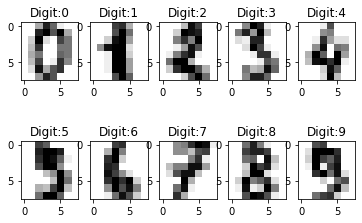

In [4]:
# 이미지 읽어 오기
for label, img in zip(digits.target[:10],digits.images[:10]):
    plt.subplot(2,5,label + 1)
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Digit:{0}'.format(label))
plt.show()

In [5]:
# digits 확인
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [6]:
label, img, img.shape

(9,
 array([[ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.],
        [ 0.,  2., 16., 16., 16., 13.,  0.,  0.],
        [ 0.,  3., 16., 12., 10., 14.,  0.,  0.],
        [ 0.,  1., 16.,  1., 12., 15.,  0.,  0.],
        [ 0.,  0., 13., 16.,  9., 15.,  2.,  0.],
        [ 0.,  0.,  0.,  3.,  0.,  9., 11.,  0.],
        [ 0.,  0.,  0.,  0.,  9., 15.,  4.,  0.],
        [ 0.,  0.,  9., 12., 13.,  3.,  0.,  0.]]),
 (8, 8))

In [7]:
images = digits.images
labels = digits.target

#차원을 하나 줄인다 -------------------------why?----------------------------
images = images.reshape(images.shape[0],-1)

## 의사결정트리 실습 순서 2. 모델 만들기

In [8]:
n_samples = len(images)
train_size = int(n_samples * 2/3)
classifier = tree.DecisionTreeClassifier(max_depth=3)
classifier.fit(images[:train_size], labels[:train_size])

DecisionTreeClassifier(max_depth=3)

## 의사결정트리 실습 순서 3. 예측하기

In [9]:
expected = labels[train_size:]
predicted = classifier.predict(images[train_size:])

## 의사결정트리 실습 순서 4. 평가하기

In [10]:
print('Accuracy:\n',
      accuracy_score(expected, predicted))
print('Confusion matrix:\n',
      confusion_matrix(expected, predicted))

Accuracy:
 0.44908180300500833
Confusion matrix:
 [[57  0  1  0  1  0  0  0  0  0]
 [ 0  0 25 16  6  0  0 15  0  0]
 [ 1  0 49  6  0  1  0  3  0  0]
 [ 0  0 10 46  0  0  0  5  0  1]
 [ 4  0 27  0 30  0  0  1  0  0]
 [ 0  0  2 29 20  5  0  3  0  0]
 [ 0  0 55  5  0  1  0  0  0  0]
 [ 0  0  0  0  6  0  0 55  0  0]
 [ 0  0 33  6  2  1  0 13  0  0]
 [ 2  0  1 21  7  0  0  0  0 27]]


In [11]:
img, img.shape

(array([[ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.],
        [ 0.,  2., 16., 16., 16., 13.,  0.,  0.],
        [ 0.,  3., 16., 12., 10., 14.,  0.,  0.],
        [ 0.,  1., 16.,  1., 12., 15.,  0.,  0.],
        [ 0.,  0., 13., 16.,  9., 15.,  2.,  0.],
        [ 0.,  0.,  0.,  3.,  0.,  9., 11.,  0.],
        [ 0.,  0.,  0.,  0.,  9., 15.,  4.,  0.],
        [ 0.,  0.,  9., 12., 13.,  3.,  0.,  0.]]),
 (8, 8))

In [12]:
n_samples

1797

In [13]:
expected

array([4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3,
       3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2,
       1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6,
       1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9,
       8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0,
       1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1,
       7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4,
       6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7,
       4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7,
       5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5,
       1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4,
       9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3,

In [14]:
predicted

array([2, 2, 7, 7, 7, 2, 2, 0, 0, 2, 2, 7, 7, 2, 0, 7, 2, 2, 9, 3, 4, 3,
       3, 0, 2, 2, 2, 4, 3, 2, 7, 0, 3, 3, 2, 7, 2, 0, 0, 7, 7, 2, 3, 2,
       7, 4, 2, 2, 3, 7, 3, 9, 2, 7, 2, 7, 2, 3, 4, 4, 0, 7, 3, 2, 3, 2,
       4, 4, 5, 2, 4, 7, 2, 2, 2, 2, 5, 7, 3, 4, 2, 7, 2, 4, 9, 0, 7, 3,
       2, 0, 3, 2, 3, 2, 3, 2, 7, 2, 3, 0, 2, 3, 3, 0, 3, 2, 7, 2, 9, 0,
       3, 2, 3, 0, 3, 2, 7, 7, 9, 0, 9, 3, 3, 2, 4, 2, 3, 7, 3, 2, 2, 2,
       7, 7, 3, 3, 2, 0, 0, 2, 3, 7, 2, 3, 0, 3, 3, 2, 3, 3, 4, 2, 3, 0,
       2, 2, 2, 4, 9, 2, 3, 0, 9, 2, 2, 2, 3, 0, 0, 2, 7, 2, 3, 2, 2, 7,
       2, 2, 3, 7, 3, 2, 2, 7, 2, 7, 2, 3, 7, 4, 0, 4, 3, 5, 9, 2, 7, 7,
       4, 2, 2, 7, 3, 2, 2, 2, 3, 7, 3, 4, 2, 7, 4, 2, 0, 0, 7, 0, 3, 2,
       3, 4, 3, 3, 7, 2, 9, 0, 3, 2, 3, 4, 3, 3, 7, 2, 9, 0, 3, 2, 3, 4,
       3, 2, 7, 2, 9, 0, 9, 3, 3, 2, 3, 0, 9, 2, 9, 2, 2, 3, 7, 4, 3, 3,
       3, 0, 0, 2, 2, 7, 3, 2, 0, 3, 2, 3, 3, 3, 7, 3, 3, 4, 2, 2, 2, 4,
       9, 3, 3, 0, 9, 3, 2, 2, 2, 0, 0, 3, 7, 3, 3,

In [19]:
T = expected == predicted
T

array([False, False,  True,  True, False, False, False,  True,  True,
        True,  True,  True, False,  True,  True, False,  True, False,
       False,  True, False,  True,  True, False, False, False, False,
        True, False, False, False,  True, False, False,  True, False,
        True,  True,  True, False,  True, False,  True,  True, False,
       False, False, False,  True, False,  True,  True, False,  True,
       False, False, False,  True, False,  True,  True, False,  True,
       False, False, False, False, False,  True, False,  True,  True,
        True, False,  True,  True,  True,  True, False, False, False,
       False, False,  True,  True,  True, False, False, False,  True,
       False,  True,  True, False, False, False,  True, False, False,
        True, False, False,  True, False, False, False,  True, False,
        True,  True, False,  True,  True, False, False, False,  True,
       False,  True,  True,  True, False, False, False, False, False,
       False, False,